In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")

# 3.1.1 연속 수치 데이터 --> 범주형 변수
http://blog.heartcount.io/dd

In [4]:
#수치형 변수들을 하나의 명목형 변수들로 만들어주기

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [9]:
# 이렇게 만든 명목형 변수를 넣어주었을 때, 값을 확인해보자.
feature_names = df.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")

label_names = "Outcome"

In [23]:
#학습,정답데이터 만들기 --> 모델만들기 --> 학습 --> 스코어

# 데이터 만들기
X = df.loc[:,feature_names]
y = df.loc[:,label_names]

# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,shuffle = True, random_state = 42)
print("X_train = {}, X_test = {}, y_train = {}, y_test = {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

# 모델 만들기 --> 학습 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train,y_train)

# 평가하기
acc = model.score(X_test, y_test)
print("acc =", acc)

X_train = (537, 8), X_test = (231, 8), y_train = (537,), y_test = (231,)
acc = 0.7012987012987013


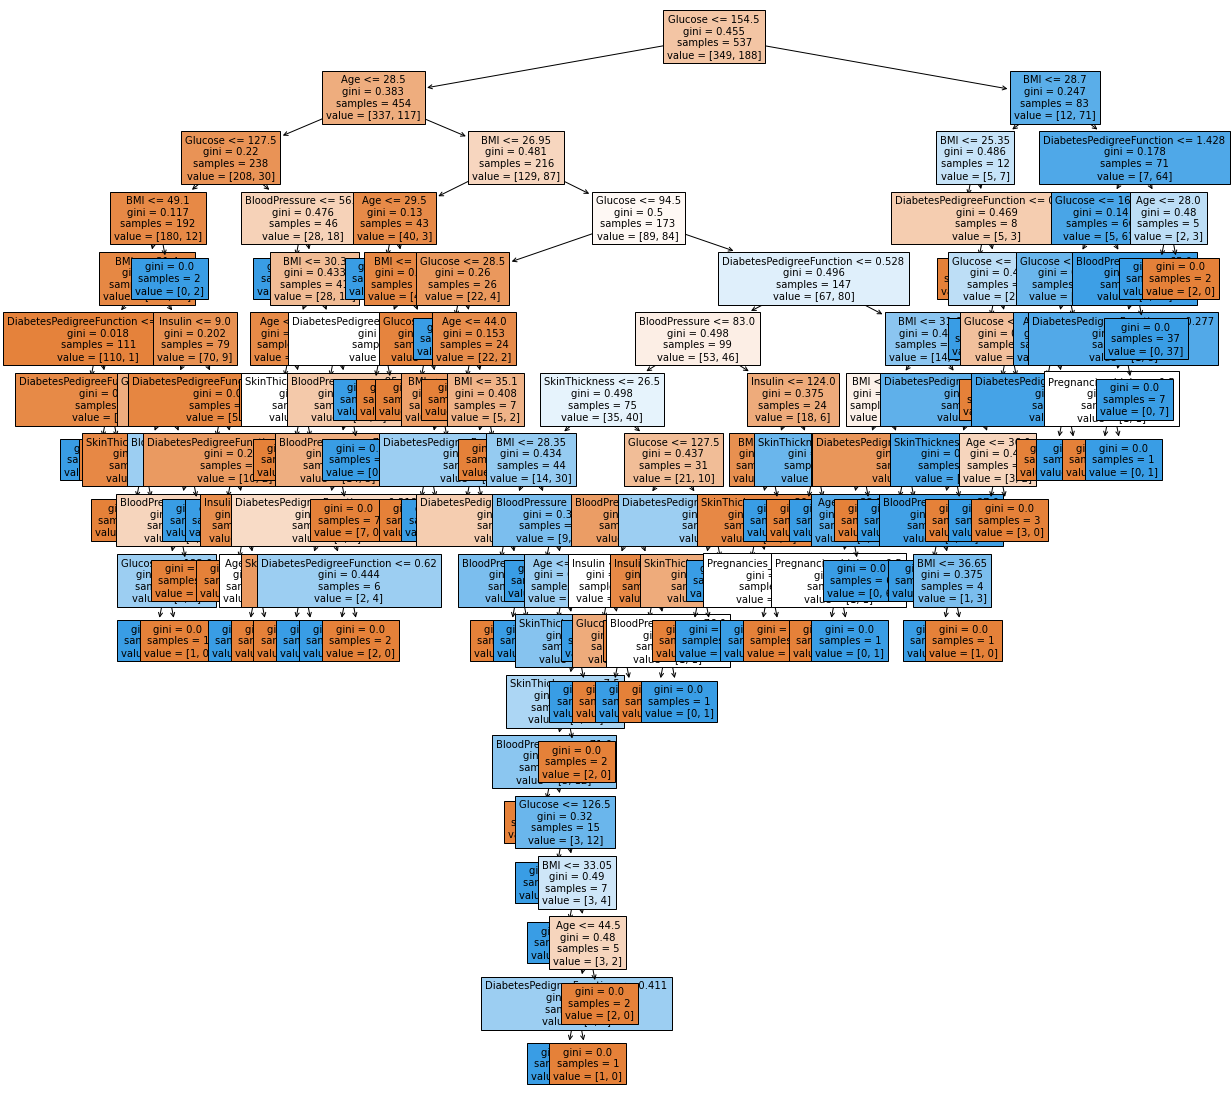

In [24]:
#시각화하기 --> 가지고 있는 모델 그 자체
from sklearn.tree import plot_tree
plt.figure(figsize = (20,20))
tree = plot_tree(model,
                feature_names = feature_names,
                filled = True,
                fontsize = 10)

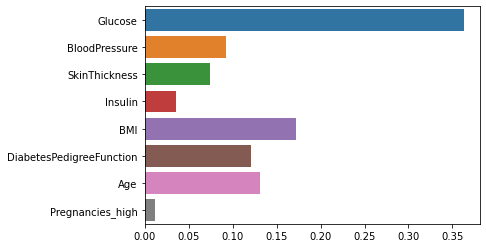

In [28]:
# feature의 중요도
sns.barplot(x = model.feature_importances_, y = feature_names)

# 원핫인코딩

범주형 데이터를 수치형 데이터 바꿔주기!

In [32]:
# 나이를 세 그룹으로 나눠보자.

df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60) # 조건식은 꼭 소괄호!
df["Age_high"] = df["Age"] > 60

df[["Age_low", "Age_middle", "Age_high"]].head()

,Age_low,Age_middle,Age_high
0,False,True,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,True,False


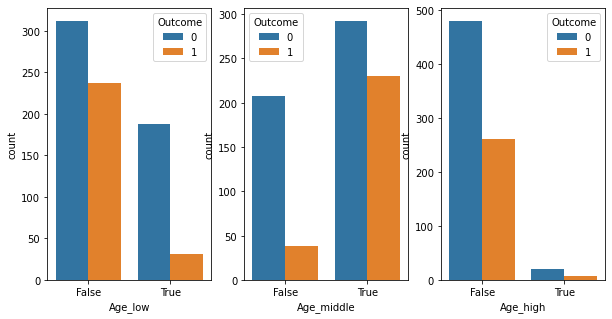

In [55]:
# subplot 사용하는 방법은
# plt.figure를 먼저 만든다 --> fig.add_subplot(row,col,순서) 형태로 만들어주면 된다.
# https://jhoplin7259.tistory.com/55

temp = ["Age_low", "Age_middle", "Age_high"]
fig = plt.figure(figsize= (10,5))

sns.countplot(data = df, x = "Age_low", hue = "Outcome" , ax = fig.add_subplot(1,3,1))
sns.countplot(data = df, x = "Age_middle", hue = "Outcome" , ax = fig.add_subplot(1,3,2))
sns.countplot(data = df, x = "Age_high", hue = "Outcome" , ax = fig.add_subplot(1,3,3))


In [63]:
# 학습 평가해보기
feature_names = df.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age')

label_names = "Outcome"

# 1) 데이터 만들기
X, y = df.loc[:,feature_names], df.loc[:,label_names]

# 2) train/test 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, shuffle = True)

# 3) model 만들기 --> 학습
model = DecisionTreeClassifier().fit(X_train, y_train)

# 4) 평가하기
model.score(X_test, y_test)



0.734375

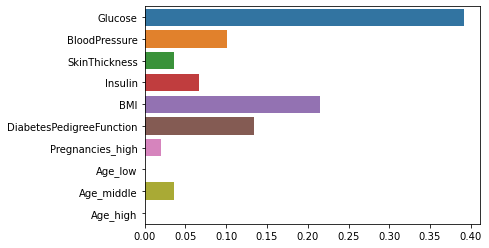

In [64]:
# 중요도 판단하기
sns.barplot(model.feature_importances_, y = feature_names)

# 결측치를 평균값으로 조정하기

In [93]:
df.isnull().sum()
df.describe() # 인슐린 수치가 0이라는 것은 결측치일 가능성이 높구나

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_nan
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,118.933073
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,93.574371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,14.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,68.700000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,100.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,127.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,846.000000


In [94]:
df["Insulin_nan"] = df["Insulin"].replace(0,np.nan)
print(df[["Insulin_nan", "Insulin"]].head())

df["Insulin_nan"].isnull().sum() #nan값이 374개로 급증했음을 볼 수 있다.

   Insulin_nan  Insulin
0          NaN        0
1          NaN        0
2          NaN        0
3         94.0       94
4        168.0      168


374

In [95]:
# 이를 groupby를 통해 확인해보자. #의미파악이 잘 안되네
df.groupby(["Outcome"])[["Insulin","Insulin_nan"]].agg(["mean","median"])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [96]:
#np.nan 값을 평균값으로 채워줍니다.
#이떄 중요한점은 Insulin이 아니라 Insulin_nan값이 나타내는 평균값을 사용해야 합니다.
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 68.7
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 100.3

#np.nan 값을 중앙값으로 채워줍니다.
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5



In [97]:
feature_names = df.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Age")
feature_names.remove("Insulin")
feature_names.remove("Outcome")

label_name = "Outcome"

# 1) 데이터 생성
X,y = df.loc[:,feature_names], df.loc[:,label_name]

# 2) train, test 분류
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle = True, random_state = 42)

# 3) model
model = DecisionTreeClassifier().fit(X_train, y_train)

# 4) score
model.score(X_test, y_test)

0.8020833333333334

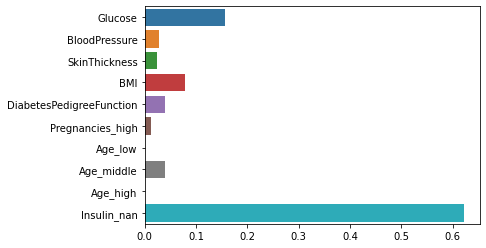

In [98]:
# 시각화하기
sns.barplot(x = model.feature_importances_, y = feature_names)

# 상관관계 확인하기

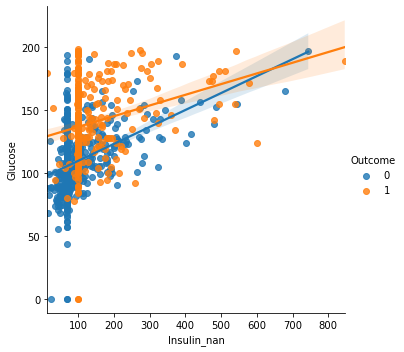

In [100]:
sns.lmplot(data = df, x = "Insulin_nan", y = "Glucose", hue = "Outcome")

In [104]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"]

0      False
1       True
2      False
3       True
4      False
       ...  
763    False
764    False
765    False
766    False
767     True
Name: low_glu_insulin, Length: 768, dtype: bool

In [105]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,255,13


In [108]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'low_glu_insulin'],
      dtype='object')

In [113]:
#해당 column을 사용해봅시다.
feature_names = df.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_nan")
feature_names.remove("Outcome")


label_name = "Outcome"

# 1) 데이터 생성
X,y = df.loc[:,feature_names], df.loc[:,label_name]

# 2) train, test 분류
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle = True, random_state = 42)

# 3) model
model = DecisionTreeClassifier().fit(X_train, y_train)

# 4) score
model.score(X_test, y_test)

0.6875

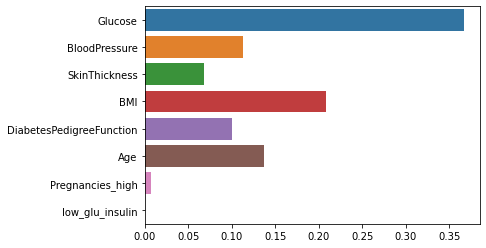

In [114]:
sns.barplot(model.feature_importances_, y = feature_names)

# outlier 다루기

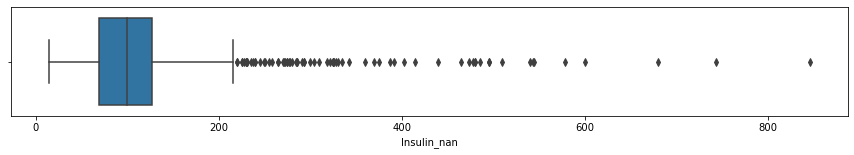

In [116]:
plt.figure(figsize = (15,2))
sns.boxplot(df["Insulin_nan"])

In [118]:
# 여기서 이게 사용되는구나.
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1

OUT = IQR3 + 1.5*IQR
OUT # 바깥쪽 범위를 의미함.

215.075

In [134]:
# train 에서만 이상치를 제거해봅시다.
feature_names = df.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("low_glu_insulin")


X = df.loc[:,feature_names]
train, test = train_test_split(X, shuffle = True, random_state = 42)
train = train[train["Insulin_nan"] < OUT]

X_train, y_train = train.drop("Outcome", axis = 1), train["Outcome"]
print("X_train = {}, y_train = {}".format(X_train.shape, y_train.shape))

X_test, y_test = test.drop("Outcome", axis =1), test["Outcome"]

#학습진행
model = DecisionTreeClassifier().fit(X_train, y_train)
#성능평가
model.score(X_test, y_test)

X_train = (524, 8), y_train = (524,)


0.828125

# 피쳐스케일링

In [140]:
# Normalize하는 영역인데, 이게 머신러닝에서는 정말 중요하지요
# 전처리는 EDA를 먼저 진행해, 인사이트를 얻은 후 진행하는 것이 좋다.
from sklearn.preprocessing import StandardScaler

# 클래스 선언
scaler = StandardScaler()
# fit 메소드 사용
scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])

# trainsform으로 수치변환
scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])

#우리의 데이터에 담음
df[["Glucose", "DiabetesPedigreeFunction"]] = scale
df[["Glucose", "DiabetesPedigreeFunction"]].head()

,Glucose,DiabetesPedigreeFunction
0,0.848324,0.468492
1,-1.123396,-0.365061
2,1.943724,0.604397
3,-0.998208,-0.920763
4,0.504055,5.484909


# 정리
1) 데이터의 종류에 대해서 익힐 필요가 있다.
http://blog.heartcount.io/dd

2) 트리 시각화
- from sklearn.tree import plot_tree <br>
plt.figure(figsize = (20,20))
tree = plot_tree(model,
                feature_names = feature_names,
                filled = True,
                fontsize = 10)
                
                
3) 원핫인코딩
- 범주형 변수를 수치형으로 바꾸는데, dummy라는 걸 사용한다

4) subplot
- for문으로 돌리는 방법도 있는데, 그것보다는
fig = plt.figure(figsize = (10,5))로 setting하고 <br>
sns.countplot(data = df, x = "Age_low", hue = "Outcome" , ax = fig.add_subplot(1,3,1)) 형태로 하면 됌

5) 결측치
- mean이나, median으로 채워줄 수 있다. <br>
이때 주의 할 점은, 결측치를 제외한 데이터들의 평균과 중앙값을 구해야 한다.

6) 이상치
- IQR을 이용해서 해결가능하다.
- 혹은 너무 많은 변수들을 제거한다고 판단되면, 임의의 입실론을 사용가능

7) 피쳐스케일링
- standard normal이나 Min-max로 만드는게 가능한데, 이거 해놓으면 성능이 진짜 좋아짐